In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
from functools import reduce
import sys
sys.path.append(os.environ['ROOT_DIR'])
from setting import *

import matplotlib.pylab as plt
import pandas as pd
import random
import seaborn as sns
from tqdm import *
import numpy as np

from src.data.helper import *
from src.model.naive_benchmark import *
from src.visualization.visualize import MailCenter

import matplotlib.pylab as plt

from src.model.transformer import *
from sklearn.pipeline import Pipeline
from src.model.base_data import *
from src.model.estimator import *

from src.model.mimo_transformer import *
from src.model.random_forest import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
EXPNAME = 'WINDOW7_HORIZON31_RESSTL'
feature = AgregatedDataFeature(expname=EXPNAME,resume=True)

In [6]:
triples = pd.read_csv(os.path.join(PROCESSED, 'triples.csv'))
triples = triples.groupby(['MC','DO']).get_group(('romford mail centre','whitechapel do'))
#triples = feature.identify_triples(triples)
#feature.triples=triples

In [7]:
Xtr,ytr,Xte,yte = feature.load_stacked_features(triples)

100%|██████████| 10/10 [00:01<00:00,  7.79it/s]

Identify 10 triples to be fitted together
Found 0 error


In [8]:
model = ExtraTreeModel(folder=TEST_MODEL,
                        frame=feature.frame,
                        specific_name='ff')

In [9]:
%time model.fit(Xtr,ytr)

CPU times: user 14.9 s, sys: 171 ms, total: 15.1 s
Wall time: 15.5 s


In [45]:
from src.model.base_estimator  import *
forecast = Forecast(model=model,feature=feature)

In [46]:
d = forecast.stl_forecast('romford mail centre','whitechapel do','T0076')

In [41]:
a = d[d.ytrue!=0]
model.SMAPE(a.ytrue,a.stlhat)

17.225338759739163

In [49]:
forecast.dump_forecasts(triples)

100%|██████████| 10/10 [00:01<00:00,  9.27it/s]

Identify 10 triples to be fitted together


In [68]:
d = pd.read_csv(os.path.join(EXTRATREE_BYMC_WINDOW7_HORIZON31_RESSTL,'forecast','glasgow_mail_centre_lanark_do_T0064.csv'))
d = d[d.ytrue!=0]

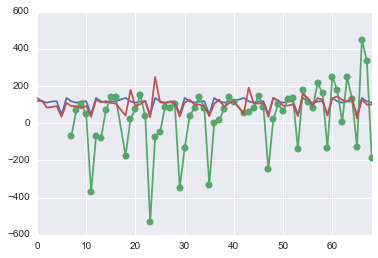

In [69]:

d.stlhat.plot()
d.yhat.plot(marker='o')
d.ytrue.plot()

In [50]:

pd.read_csv('/Users/cthorey/Documents/project/RM-DS/models/EXTRATREE_BYMC_WINDOW7_HORIZON31_RESSTL/forecast/glasgow_mail_centre_larkhall_do_T0003.csv ')

IOError: File /Users/cthorey/Documents/project/RM-DS/models/EXTRATREE_BYMC_WINDOW7_HORIZON31_RESSTL/forecast/glasgow_mail_centre_larkhall_do_T0003.csv  does not exist

In [149]:
EXPNAME = 'WINDOW7_HORIZON31_RESSTL'
FRAME = dict(window=7, horizon=31)

In [150]:
feature = AgregatedDataFeature(expname=EXPNAME,resume=True)

In [152]:
triples = pd.read_csv(os.path.join(PROCESSED,'triples.csv'))

In [158]:
d = triples[triples.MC=='aberdeen mail centre']

In [159]:
d = d[d.DO=='bridge of don do']

In [163]:
Xtr,ytr,Xte,yte = feature.load_stacked_features(triples=d)

100%|██████████| 10/10 [00:00<00:00, 35.24it/s]

Identify 10 triples to be fitted together
Found 3 error


In [164]:
model.fit(Xtr,ytr)

In [169]:
train_feat,test_feat = feature.load_feature('aberdeen mail centre','bridge of don do','T0076')

In [112]:
chunks(MCs,10)

<generator object chunks at 0x11ba2cf00>

In [111]:
MCs = pd.read_csv(os.path.join(PROCESSED, 'triples.csv')).MC.unique().tolist()

In [83]:
model = ExtraTreeModel(folder=TEST_MODEL,frame=feature.frame,specific_name='hello')

In [84]:
%time model.fit(Xtr,ytr)

CPU times: user 40.5 s, sys: 398 ms, total: 40.9 s
Wall time: 41.1 s


In [21]:
train_feat,test_feat = feature.load_feature('birmingham mail centre', 'alcester do', 'T0076')

In [50]:
res = model.forecast(test_feat)
d = d.set_index('date')

In [62]:
res.columns = ['stl_error','errorhat','errorstd']

In [64]:
d = d.join(res)

In [67]:
da = d[d.ytrue!=0]

In [74]:
model.SMAPE(da.ytrue,da.yhat)

13.472136154128918

In [75]:
model.SMAPE(da.ytrue,da.yhat+da.errorhat)

11.696595533820831

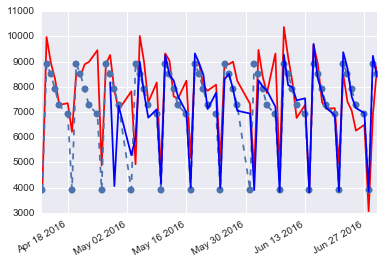

In [81]:
da.ytrue.plot(color='r')
da.yhat.plot(marker='o',ls='--')
(da.yhat+da.errorhat).plot(color='b')

In [39]:
d = pd.read_csv(os.path.join(STL_MODEL,'birmingham_mail_centre_alcester_do_T0076.test'))

In [42]:
d

,date,ytrue,yhat,Lo80,Hi80,Lo95,Hi95,MC,DO,stream
0,2016-04-12,3879.00,3915.794589,1428.183503,6403.405676,111.321740,7720.267439,birmingham mail centre,alcester do,T0076
1,2016-04-13,9979.00,8914.801629,6400.670315,11428.932943,5069.769591,12759.833667,birmingham mail centre,alcester do,T0076
2,2016-04-14,8973.00,8494.375065,5954.000366,11034.749764,4609.207233,12379.542897,birmingham mail centre,alcester do,T0076
3,2016-04-15,8312.00,7906.727696,5340.377961,10473.077431,3981.834475,11831.620917,birmingham mail centre,alcester do,T0076
4,2016-04-16,7283.00,7262.755464,4670.690977,9854.819952,3298.534922,11226.976006,birmingham mail centre,alcester do,T0076
5,2016-04-18,7353.00,6918.916979,4301.390350,9536.443609,2915.755452,10922.078507,birmingham mail centre,alcester do,T0076
6,2016-04-19,6216.25,3915.794589,1273.051128,6558.538051,-125.932755,7957.521934,birmingham mail centre,alcester do,T0076
7,2016-04-20,8532.00,8914.801629,6247.079688,11582.523570,4834.872997,12994.730260,birmingham mail centre,alcester do,T0076
8,2016-04-21,8438.00,8494.375065,5801.906364,11186.843765,4376.599531,12612.150599,birmingham mail centre,alcester do,T0076
9,2016-04-22,8896.00,7906.727696,5189.737624,10623.717768,3751.449960,12062.005431,birmingham mail centre,alcester do,T0076


In [8]:
fore.verbose = True

In [ ]:
Xtr,ytr,Xte,yte = fore.load_stacked_features()

  2%|▏         | 280/12900 [00:29<29:21,  7.17it/s]

In [37]:
fore.dirname

'/Users/cthorey/Documents/project/RM-DS/models'

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

In [4]:
test_triples = pd.read_csv(os.path.join(PROCESSED,'test_triple.csv'))

In [5]:
mc = MailCenter('aberdeen mail centre')
mc2 = MailCenter('bristol mail centre')

In [6]:
class Forecast(AgregatedDataFeature,ExtraTreeModel):
    pass

In [7]:
bir = Forecast(expname='bristol',triples=mc2.df,override=True,verbose=True)

Identify 545 triples to be fitted together


In [ ]:
bir.

In [8]:
bir.gen_features()

100%|██████████| 545/545 [44:50<00:00,  7.77s/it]


In [9]:
FRAME = dict(window=7, horizon=31)
bir = Forecast(expname='bristol',resume=True)
#bir.gen_features()
Xtr,ytr,Xte,yte = bir.load_stacked_features()

100%|██████████| 545/545 [00:38<00:00, 14.21it/s]


In [29]:
Xtr.shape

(105273, 89)

In [10]:
%time bir.fit(Xtr,ytr)
bir.SMAPE(yte,bir.predict(Xte))

CPU times: user 2min 17s, sys: 1.97 s, total: 2min 19s
Wall time: 2min 21s


29.366458695775332

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
bir.SMAPE(yte,bir.predict(Xte))

32.344906292568879

In [39]:
%time bir.fit(Xtr,ytr)

CPU times: user 47.3 s, sys: 4.06 s, total: 51.4 s
Wall time: 17.5 s


In [46]:
bir.SMAPE(yte,bir.predict(Xte))

33.776419222389066

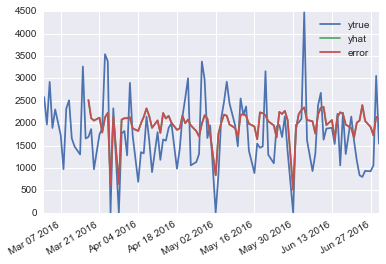

In [49]:
bir.forecast(*bir.triples[8]).plot()

In [45]:
grid = dict(n_estimators = [10,30])
res = bir.gridsearch(Xtr,ytr,grid,iterator)

100%|██████████| 2/2 [00:18<00:00,  6.97s/it]


In [46]:
best_params = bir.get_best_grid_params(res)

In [48]:
res

,bootstrap,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_jobs,oob_score,random_state,score,std,verbose,warm_start
0,True,mse,20,auto,None,1.000000e-07,1,2,0.0,30,1,False,None,24.986636,0.119832,0,False
1,True,mse,20,auto,None,1.000000e-07,1,2,0.0,10,1,False,None,25.793474,0.079805,0,False


In [50]:
bir.fit(Xtr,ytr,**best_params)

In [51]:
bir.dump_model()

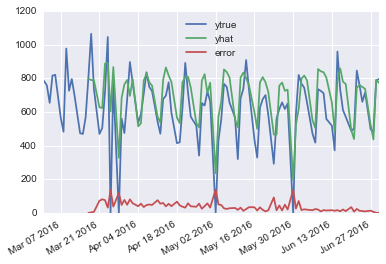

In [59]:
bir.forecast(*bir.triples[6]).plot()

In [60]:
MC,DO,stream = bir.triples[6]

In [62]:
fname = bir.MCDOstream2name(MC, DO, stream)
fname

'bristol_mail_centre_tewkesbury_do_T0003'

In [66]:
forecast = bir.forecast(MC, DO, stream).reset_index()

In [16]:
bir.MC_encoder.transform(['bristol mail centre'])

array([0])

In [14]:
bir.MC_encoder.classes_

array(['bristol mail centre'], dtype=object)

In [11]:
bir.MC_encoder.classes_

array(['bristol mail centre'], dtype=object)

In [ ]:
mean,std

In [10]:
mean,std

(26.028301009386322, 0.22843247748750031)

In [18]:
train,test= bir.load_feature(*bir.triples[0])

In [25]:
from src.model.mimo_transformer import *

In [31]:
m = MimoHollidayTransformer(**FRAME)

In [39]:
m.fit_transform(train[0]).shape

(546, 31)

In [38]:
m.label.transform('Nothing')

20

In [15]:
bir.triples

[('bristol mail centre', 'avonmouth do', 'T0001'),
 ('bristol mail centre', 'tewkesbury do', 'T0079'),
 ('bristol mail centre', 'bridgwater do', 'T0094'),
 ('bristol mail centre', 'tewkesbury do', 'T0076'),
 ('bristol mail centre', 'tewkesbury do', 'T0064'),
 ('bristol mail centre', 'tewkesbury do', 'T0030'),
 ('bristol mail centre', 'tewkesbury do', 'T0003'),
 ('bristol mail centre', 'bridgwater do', 'T0095'),
 ('bristol mail centre', 'tewkesbury do', 'T0001'),
 ('bristol mail centre', 'tetbury do', 'T0095')]

In [5]:
mean,std

(25.558900099463113, 0.1521483798531845)

In [6]:
bir.fit(Xtr,ytr)

In [7]:
bir.SMAPE(yte,bir.predict(Xte))

33.829522908852759

In [8]:
bir.SMAPE(yte,bir.predict(Xte))

33.602096118812931

In [6]:
36.03

36.03

In [10]:
yte.shape

(920, 31)

In [6]:
score

[(26, 24.7640524000299, 0.27060878042399483),
 (27, 24.775710776988344, 0.28578872671100181),
 (28, 24.703845645625766, 0.26377219811970248),
 (29, 24.775296756764504, 0.22451199799197977),
 (30, 24.623063637073823, 0.25630136219096017),
 (31, 24.647885038775826, 0.09555721012368025),
 (32, 24.704287785013037, 0.10104358791285406),
 (33, 24.823864211498758, 0.15292319699494289),
 (34, 24.77627887558593, 0.064599706809898544)]

In [153]:
mean,score

(-24.874683558789645, 0.13783256662948792)

In [11]:
not True

False